In [ ]:
# Desafio 1: Voce irá entrar em uma conversa do seu whats up. Baixar a conversa em formato txt. Depois disso irá importar usando PYTHON. 
# O desafio será, na leitura voce deverá identificar os seguintes pontos:
# 1 - Quais as palavras mais trocadas na conversa.
# 2 - Qual o dia da semana que mais troca mensagem.
# 3 - Qual o horario que mais fala.
# 4 - Qual o horario que menos fala.


# Para fazer esse desafio, voce deverá levar em consideração hum mês de conversa.


In [1]:
import datetime

from collections import Counter

import collections

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ref_arquivo = open('GRUPOBI23_chat.txt', "r", encoding='utf-8')
linha = ref_arquivo.readline()

list_datas = []
list_erros_formatacao = []
list_pessoas = []
list_msgs = []

while linha:
    linha = ref_arquivo.readline()
    
    try:
        date_time_obj = datetime.datetime.strptime(linha[1:20], '%d/%m/%Y %H:%M:%S')
        list_datas.append(date_time_obj)
        msg = linha[21:]
        if(len(msg.split(':')) >= 2):
            list_pessoas.append(msg.split(':')[0])
            list_msgs.append(msg.split(':')[1])
    except ValueError:
        list_erros_formatacao.append('Errors de formatação de data')
ref_arquivo.close()

<AxesSubplot:title={'center':'1 - Quais as palavras mais trocadas na conversa'}, xlabel='Palavra'>

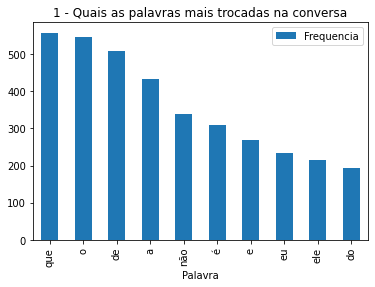

In [3]:
def contador_palavras(msgs):
    palavras = []
    for frases in msgs:
        for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

palavras_dict = dict(contador_palavras(list_msgs))

palavras_df = pd.DataFrame(palavras_dict.items(), columns=['Palavra', 'Frequencia'])
palavras_df = palavras_df.sort_values(by=['Frequencia'], ascending=False)
palavras_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='1 - Quais as palavras mais trocadas na conversa')

In [4]:
dia_da_semana = {
  0: "Domingo",
  1: "Segunda",
  2: "Terça"
}
list_horas = []
list_dia_semana = []
for data in list_datas:
    list_horas.append(data.time().hour)
    
    list_dia_semana.append(dia_da_semana.get(data.weekday()))
    
    if(data.weekday() == 1):
        list_dia_semana.append('segunda')
    elif(data.weekday() == 2):
        list_dia_semana.append('terca')
    elif(data.weekday() == 3):
        list_dia_semana.append('quarta')
    elif(data.weekday() == 4):
        list_dia_semana.append('quinta')
    elif(data.weekday() == 5):
        list_dia_semana.append('sexta')
    elif(data.weekday() == 6):
        list_dia_semana.append('sabado')
    elif(data.weekday() == 0):
        list_dia_semana.append('domingo')

In [5]:
dict_dia_semana = dict(Counter(list_dia_semana))

<AxesSubplot:title={'center':'2 - Qual o dia da semana que mais troca mensagem.'}, xlabel='Dia_Semana'>

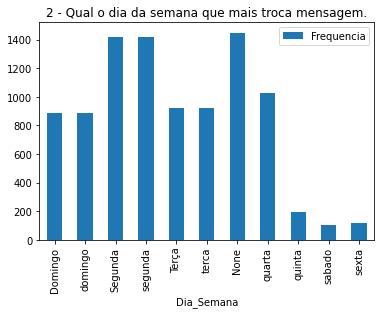

In [6]:
semana_df = pd.DataFrame(dict_dia_semana.items(), columns=['Dia_Semana', 'Frequencia'])
semana_df.plot(kind='bar', x = 'Dia_Semana', y='Frequencia', title='2 - Qual o dia da semana que mais troca mensagem.')

<AxesSubplot:title={'center':'3 - Qual o horario que mais fala.'}, xlabel='Hora'>

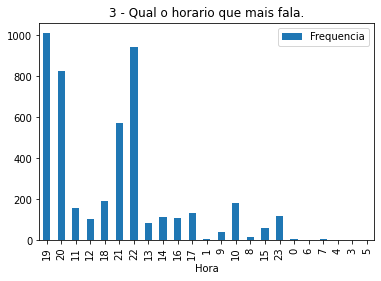

In [7]:
dict_horas = dict(Counter(list_horas))
horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='3 - Qual o horario que mais fala.')

<AxesSubplot:title={'center':'4 - Qual o horario que menos fala.'}, xlabel='Hora'>

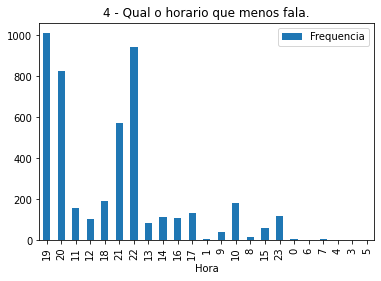

In [9]:
dict_horas = dict(Counter(list_horas))
horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='4 - Qual o horario que menos fala.')